In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from mpl_toolkits import mplot3d
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [3]:
#Create a path to where your data is stored.
path = r'C:\Users\casbacar\Documents\Study\Specialization\Data Sets'

In [4]:
#Read in the European weather data.
climate = pd.read_csv(os.path.join(path, 'dataset_scaled.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,-1.833187,-0.02793,0.284075,1.037367,-0.005632,-0.004619,-0.179228,0.720943,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22946,20221028,10,0.244897,-0.02793,0.103401,0.976231,-0.005632,-0.004619,-0.179228,0.187388,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22947,20221029,10,-0.586336,-0.02793,0.013064,0.716402,-0.005632,-0.004619,-0.179228,0.349774,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
22948,20221030,10,-0.170720,-0.02793,0.374412,0.487141,-0.005632,-0.004619,-0.179228,0.280180,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [5]:
#Reduce to just the mean temperatures
df = climate[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [6]:
#You'll need to reduce the dataset to only one year of data. Analyze and pick which year you want to use.
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df['DATE'].describe()

count                  22950
mean     1991-06-01 12:00:00
min      1960-01-01 00:00:00
25%      1975-09-16 06:00:00
50%      1991-06-01 12:00:00
75%      2007-02-14 18:00:00
max      2022-10-31 00:00:00
Name: DATE, dtype: object

In [7]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notemp = df.drop(['DATE','MONTH'], axis=1)

In [10]:
notemp.describe()

,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
count,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,22950.000000,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04,2.295000e+04
mean,1.832860e-16,3.467572e-17,-1.981470e-17,-8.916615e-17,4.953675e-18,-5.449042e-17,5.449042e-17,3.715256e-18,6.935145e-17,-3.962940e-17,2.972205e-17,0.000000,2.476837e-17,-6.328320e-16,-7.430512e-17,1.040272e-16,-1.287955e-16,6.811303e-17
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-3.923787e+00,-3.400197e+00,-3.322446e+00,-3.674358e+00,-3.728587e+00,-4.073536e+00,-3.513367e+00,-3.682571e+00,-3.175066e+00,-3.757828e+00,-2.619250e+00,-3.960550,-3.450850e+00,-3.536770e+00,-3.912230e+00,-3.886875e+00,-3.802726e+00,-4.273275e+00
25%,-7.730748e-01,-7.898932e-01,-8.050781e-01,-7.156006e-01,-7.390811e-01,-7.485639e-01,-7.703772e-01,-6.701991e-01,-8.259189e-01,-7.272125e-01,-8.400104e-01,-0.768437,-7.326432e-01,-7.247892e-01,-6.947092e-01,-7.518489e-01,-7.122622e-01,-5.780885e-01
50%,4.176451e-02,8.399110e-02,6.596732e-03,2.804430e-02,2.670365e-02,-6.839401e-03,-1.641310e-03,-5.705221e-03,5.803827e-02,2.293996e-02,-1.256187e-01,0.048442,-4.552024e-03,-7.461638e-04,5.117063e-02,-4.273596e-02,-6.318800e-03,-7.287352e-03
75%,7.887005e-01,8.103365e-01,8.065081e-01,7.716892e-01,7.630351e-01,8.371920e-01,8.020371e-01,7.141632e-01,8.087964e-01,7.580894e-01,8.448758e-01,0.789917,8.448876e-01,7.232969e-01,7.531752e-01,8.405451e-01,7.623751e-01,6.836824e-01
max,2.554186e+00,2.490010e+00,2.512202e+00,3.113379e+00,3.016209e+00,2.499678e+00,3.440199e+00,2.844235e+00,2.382967e+00,3.113568e+00,2.489325e+00,2.574485,2.422418e+00,2.710206e+00,2.595937e+00,2.607107e+00,3.068457e+00,3.868152e+00


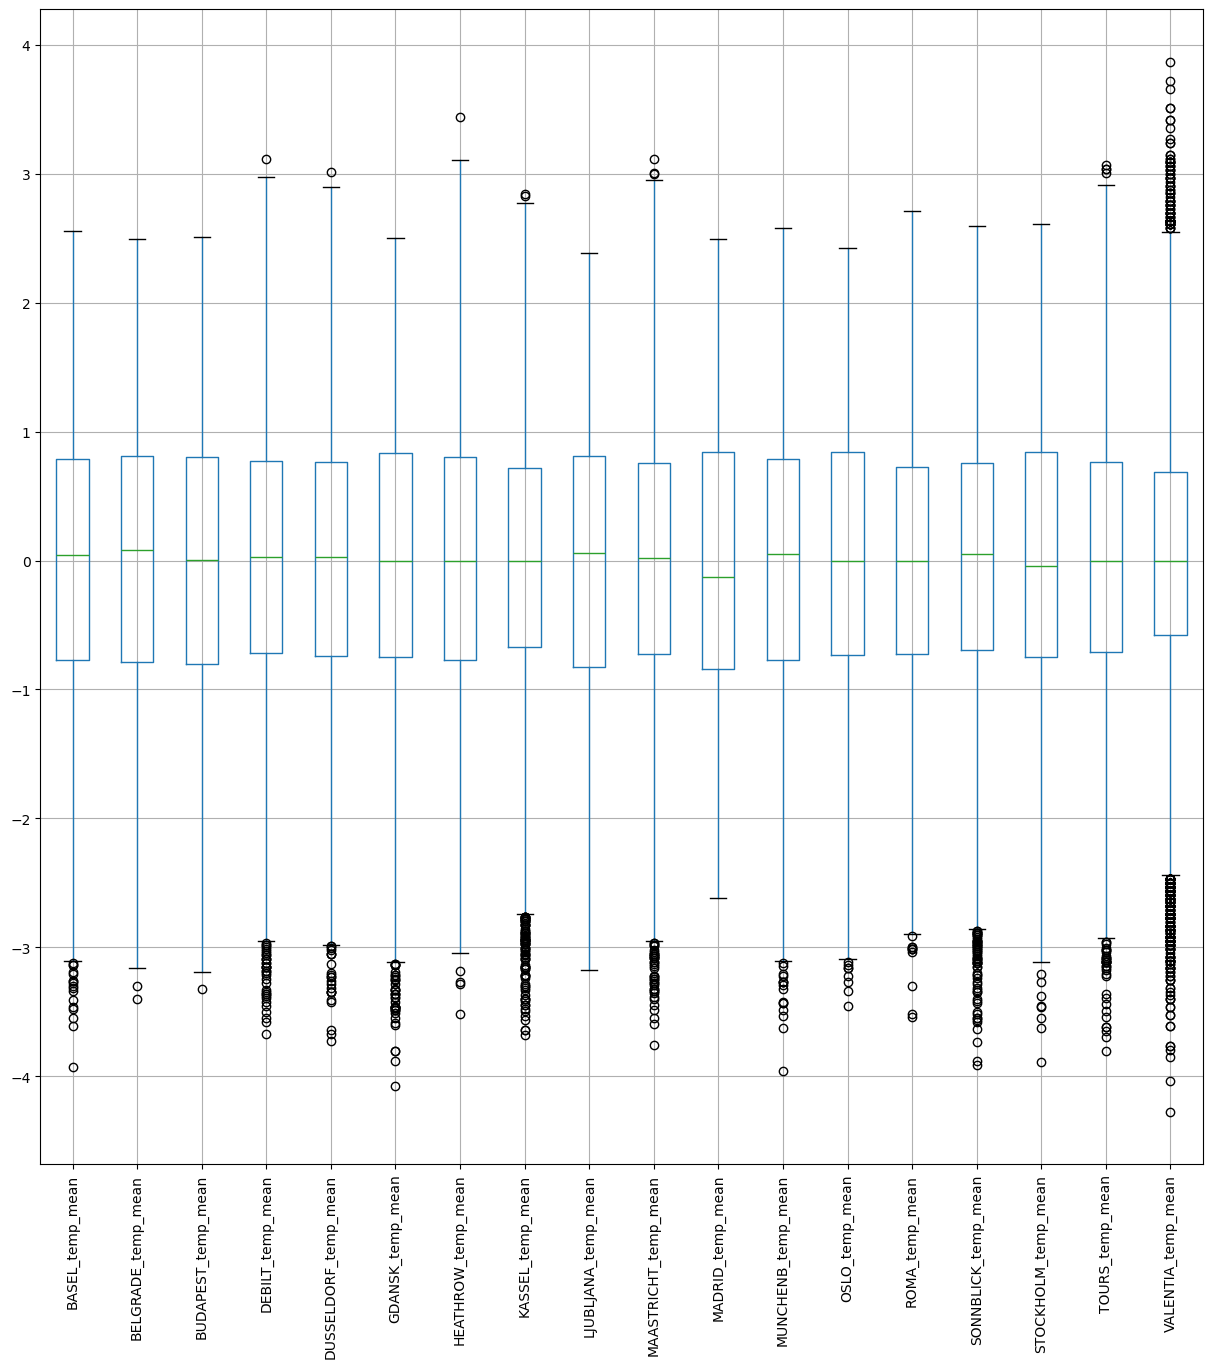

In [9]:
#Look at a whisker plot of the data to see variations in temperatures
notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)
plt.show()

In [11]:
#Reduce your dataset to a single year
dfyear = df[df['DATE'].astype(str).str.contains('1991')] #<-----INSERT YEAR HERE
dfyear

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
11323,1991-01-01,1,-0.773075,-0.631005,-1.028583,-0.826356,-0.871621,-0.953178,-0.787848,-0.891697,-0.813810,-0.817231,-1.230904,-0.781005,-1.302981,-0.808980,-0.928711,-1.299234,-0.837763,-0.878510
11324,1991-01-02,1,-0.678010,-1.119018,-0.910949,0.012222,0.100337,-0.799717,-0.665550,-0.478234,-1.213407,-0.082081,-1.473528,-0.466820,-0.635564,-1.398318,-0.826335,-0.689646,-0.320071,-0.638173
11325,1991-01-03,1,-0.026139,-0.812591,-0.675681,-0.320045,-0.312009,-0.428855,-0.595665,-0.345335,-0.486867,-0.277121,-1.527444,-0.026962,-0.890396,-1.263612,0.095046,-0.478156,-0.288696,-1.569480
11326,1991-01-04,1,-0.610107,-0.778544,-0.946239,-0.668134,-0.577088,-0.774141,-0.945090,-0.611133,-0.281014,-0.637194,-1.311779,-0.416551,-0.647699,-0.775304,-0.138956,-0.726968,-0.790700,-1.329143
11327,1991-01-05,1,-0.637268,-0.801242,-0.805078,-0.731423,-0.606541,-0.748564,-0.875205,-0.773565,-1.031772,-0.787225,-1.392653,-0.781005,-0.429272,-1.027877,-0.914086,-0.478156,-0.853451,-1.539438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,1991-12-27,12,-0.976785,-1.436795,-1.205034,-0.509912,-0.665448,-0.850871,-1.032446,-0.847397,-1.516132,-0.607188,-1.176988,-0.944380,-1.181633,-1.650891,-1.133462,-1.013101,-0.978952,-0.728299
11684,1991-12-28,12,-1.492850,-1.607032,-1.205034,-0.557378,-0.709628,-0.799717,-1.329458,-1.260860,-0.874355,-0.832234,-1.096113,-1.359104,-0.963205,-1.566700,-1.806216,-0.913576,-1.229954,-0.848468
11685,1991-12-29,12,-1.669398,-1.754571,-1.534409,-0.652312,-0.812714,-0.390490,-1.067389,-1.024596,-1.467696,-0.787225,-1.217425,-1.459643,-0.489946,-1.667729,-1.308963,-0.415953,-1.418206,-0.578088
11686,1991-12-30,12,-1.465688,-1.334652,-1.075636,-0.620667,-0.783261,-0.454432,-0.840262,-0.876931,-1.479805,-0.847237,-1.392653,-1.158026,-0.732643,-1.768758,-0.709334,-0.664765,-1.433893,-0.457920


In [153]:
dfyear.describe()

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
count,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,1991-07-02 00:00:00,6.526027,-0.046603,-0.129839,-0.104173,-0.072004,-0.011626,-0.016159,-0.086987,-0.056154,-0.084782,-0.078176,-0.013539,-0.130015,0.016360,-0.102467,-0.040467,0.008799,-0.086046,0.035430
min,1991-01-01 00:00:00,1.000000,-2.606463,-2.571709,-2.334321,-2.930713,-3.124795,-2.474992,-2.901872,-3.165743,-2.569615,-2.947664,-1.850942,-2.842054,-2.176691,-2.391772,-2.756848,-1.883942,-3.206596,-3.011504
25%,1991-04-02 00:00:00,4.000000,-0.813817,-0.926083,-0.946239,-0.731423,-0.724354,-0.684622,-0.840262,-0.906464,-0.886464,-0.757219,-0.893927,-0.982083,-0.647699,-0.926848,-0.650834,-0.677205,-0.837763,-0.788384
50%,1991-07-02 00:00:00,7.000000,-0.039719,-0.086246,-0.063984,-0.035245,0.011977,-0.096358,-0.123940,-0.079538,-0.014616,-0.052075,-0.395200,-0.102366,0.043987,-0.354349,-0.124331,-0.117379,-0.053382,-0.067372
75%,1991-10-01 00:00:00,10.000000,0.843023,0.730892,0.759455,0.676756,0.748308,0.722097,0.784566,0.806454,0.820905,0.728083,1.006625,0.727080,0.687135,1.110576,0.767800,0.641496,0.778063,0.924020
max,1991-12-31 00:00:00,12.000000,2.051701,1.854458,1.994612,2.290623,2.603864,2.000932,1.990084,2.563671,1.874389,2.438431,2.300618,2.235165,2.082643,2.070354,2.069434,2.009960,2.252700,3.717941
std,NaN,3.452584,1.047760,1.013461,1.030693,1.028722,1.032851,0.909449,1.047801,1.101145,1.057925,1.031582,1.114657,1.049031,0.918688,1.218008,0.984978,0.883441,1.107505,1.197691


In [154]:
#Pick which weather station you want to use. Below is a 3D visualization of the temperatures for that year.

In [155]:
#Drop the DATE and MONTH data as those numbers are not scaled with the rest.
notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

In [156]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [160]:
#We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
#We'll scale this by 100 as the index is made. This will help teh gradient descent converge 366 = 3.66

i = np.arange(0.01,3.66,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

,index
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05
...,...
360,3.61
361,3.62
362,3.63
363,3.64


In [161]:
n_rows = dfyear.shape[0]
n_rows

365

In [162]:
#This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)
#Represent x_0 as a vector of 1s for vector computation
ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['VALENTIA_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [163]:
# Check sizes
print("Number of rows:", len(dfyear))
print("Size of index:", len(index))
n_rows = len(dfyear)  # Use actual number of rows

Number of rows: 365
Size of index: 365


In [164]:
X.shape, y.shape

((365, 2), (365, 1))

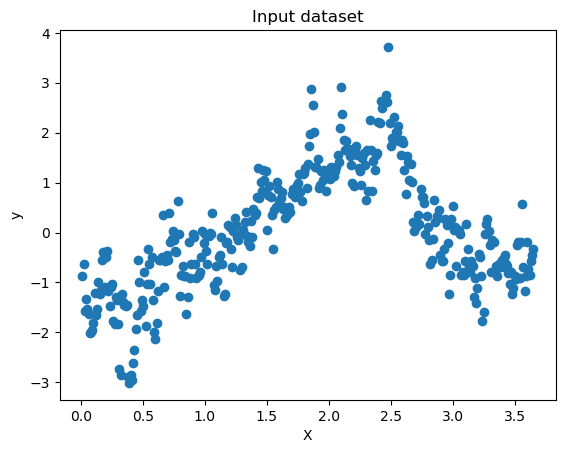

In [165]:
#Look at one year of temperature data over time
plt.scatter(x=index['index'], y=dfyear['VALENTIA_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');

plt.show()

In [166]:
#what is the min temperature? (Note gradient descent is not actually finding this number)
dfyear['VALENTIA_temp_mean'].min()

-3.011503836156746

In [167]:
#what is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['VALENTIA_temp_mean'].max()

3.7179410880356816

In [168]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [169]:
compute_cost(X,y)

array([0.71589392])

In [170]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

In [199]:
%%time
#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=50 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[0],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.
#If your solution is not converging, try a smaller step size.
theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 46.9 ms
Wall time: 72.3 ms


In [200]:
theta

array([[-0.34229432],
       [ 0.30843441]])

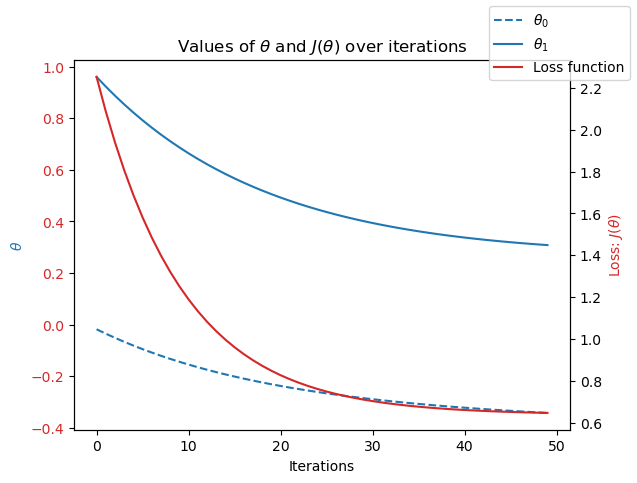

In [201]:
#This will plot your loss, theta0, and theta1.If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend();

plt.show()

In [202]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [203]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
#black line = path of loss function over the iterations.
#Find where it is closest to 0 in X and Y!

#you can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

In [204]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=50 #<---start with the same iterations as above
theta_init=np.array([[0],[1]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.01 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

In [205]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

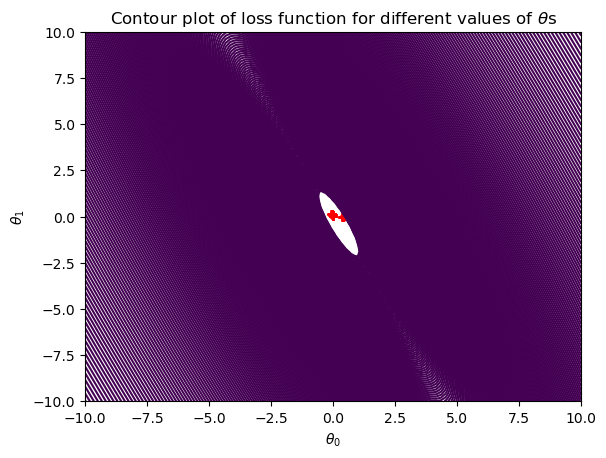

In [178]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

In [179]:
#How well does gradient descent converge? How much do you need to adjust between different weather stations and years?

In [180]:
%%time
# theta range
theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# compute cost for each combination of theta
c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 1.05 s
Wall time: 4.12 s


In [12]:
dfyear.to_csv('C:\\Users\\casbacar\\Documents\\Study\\Specialization\\Data Sets\\dataset_scaled_temp.csv')